In [2]:
#This code calculates the mean dominant season across different algorithms overlayed with the mean AR freq across algorithms as the opqacity factor
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches

In [3]:
#Mean AR Freq

# Load mean AR frequency datasets for each algorithm
file_names = [
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CB.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CN.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_GW.nc', 
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_RD.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_MD.nc'
]

mean_ar_frequencies = []

for file in file_names:
    dataset = xr.open_dataset(file)
    ar_freq=dataset.ar_binary_tag.values
    mean_ar_frequencies.append(ar_freq / ar_freq.max() )  # Normalizing

# Convert list to a NumPy array (shape: 6, height, width)
mean_ar_frequencies = np.stack(mean_ar_frequencies, axis=0)
print(mean_ar_frequencies[3].min())
# Now calculate the mean across algorithm
mean_across_algorithms = np.mean(mean_ar_frequencies, axis=0)  
print(mean_across_algorithms.max())


0.0
0.9383964038169795


In [4]:
# Reading the datasets with consistency scale values for each algorithm and IVT
#Can only be generated after running NCS1.py,NCS2.py
CB = np.load('CBcsv.npy')
CN = np.load('CNcsv.npy')
GW = np.load('GWcsv.npy')
Reid = np.load('RDcsv.npy')
MD = np.load('MDcsv.npy')


Mean_csv = np.nanmean([CB, CN, GW, Reid, MD], axis=0)
# Find indices where mean_csv is equal to 0
zero_indices = np.where(Mean_csv == 0)
print(CB[96,336])
# Check the shape of the resulting mean


0.7114582486036499


/tmp/ipykernel_15508/1892315279.py:10: RuntimeWarning: Mean of empty slice
  Mean_csv = np.nanmean([CB, CN, GW, Reid, MD], axis=0)


In [5]:
# Replace values below 0.6 with NaN for each algorithm
CB = np.where(CB < 0.6, np.nan, CB)
CN = np.where(CN < 0.6, np.nan, CN)
GW = np.where(GW < 0.6, np.nan, GW)
Reid = np.where(Reid < 0.6, np.nan, Reid)
MD = np.where(MD < 0.6, np.nan, MD)

In [6]:
# Reading angle values from different algorithms
CBC = np.load("/N/u/dkamnani/BigRed200/Paper Final/Data/CBCangletest.npy")
CNC = np.load("/N/u/dkamnani/BigRed200/Paper plots/CNCangle.npy")
GWC = np.load("/N/u/dkamnani/BigRed200/Paper plots/GWCangle.npy")
RDC = np.load("/N/u/dkamnani/BigRed200/Paper plots/RDCangle.npy")
MDC = np.load("/N/u/dkamnani/BigRed200/Paper plots/MDCangle.npy")

CBHC = np.load("/N/u/dkamnani/BigRed200/Paper plots/CBHCangle.npy")
CNHC = np.load("/N/u/dkamnani/BigRed200/Paper plots/CNHCangle.npy")
GWHC = np.load("/N/u/dkamnani/BigRed200/Paper plots/GWHCangle.npy")
RDHC = np.load("/N/u/dkamnani/BigRed200/Paper plots/RDHCangle.npy")
MDHC = np.load("/N/u/dkamnani/BigRed200/Paper plots/MDHCangle.npy")
print(CNC[44,78])

120.06858282186246


In [7]:
#Reading all algorithms x,y values
CB_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/CBx.npy")
CB_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/CBy.npy")

CN_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/CNx.npy")
CN_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/CNy.npy")

GW_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/GWx.npy")
GW_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/GWy.npy")

RD_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/RDx.npy")
RD_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/RDy.npy")

MD_x=np.load("/N/u/dkamnani/BigRed200/Paper plots/MDx.npy")
MD_y=np.load("/N/u/dkamnani/BigRed200/Paper plots/MDy.npy")


# Find the mean of each individual algorithm's x and y values, ignoring NaNs
CB_x_mean = np.nanmean(CB_x, axis=0)
CB_y_mean = np.nanmean(CB_y, axis=0)

CN_x_mean = np.nanmean(CN_x, axis=0)
CN_y_mean = np.nanmean(CN_y, axis=0)

GW_x_mean = np.nanmean(GW_x, axis=0)
GW_y_mean = np.nanmean(GW_y, axis=0)

RD_x_mean = np.nanmean(RD_x, axis=0)
RD_y_mean = np.nanmean(RD_y, axis=0)

MD_x_mean = np.nanmean(MD_x, axis=0)
MD_y_mean = np.nanmean(MD_y, axis=0)

print(CN_y_mean[44,78])

/tmp/ipykernel_15508/2578528126.py:19: RuntimeWarning: Mean of empty slice
  CB_x_mean = np.nanmean(CB_x, axis=0)
/tmp/ipykernel_15508/2578528126.py:20: RuntimeWarning: Mean of empty slice
  CB_y_mean = np.nanmean(CB_y, axis=0)
/tmp/ipykernel_15508/2578528126.py:22: RuntimeWarning: Mean of empty slice
  CN_x_mean = np.nanmean(CN_x, axis=0)
/tmp/ipykernel_15508/2578528126.py:23: RuntimeWarning: Mean of empty slice
  CN_y_mean = np.nanmean(CN_y, axis=0)
/tmp/ipykernel_15508/2578528126.py:25: RuntimeWarning: Mean of empty slice
  GW_x_mean = np.nanmean(GW_x, axis=0)
/tmp/ipykernel_15508/2578528126.py:26: RuntimeWarning: Mean of empty slice
  GW_y_mean = np.nanmean(GW_y, axis=0)
/tmp/ipykernel_15508/2578528126.py:28: RuntimeWarning: Mean of empty slice
  RD_x_mean = np.nanmean(RD_x, axis=0)
/tmp/ipykernel_15508/2578528126.py:29: RuntimeWarning: Mean of empty slice
  RD_y_mean = np.nanmean(RD_y, axis=0)


0.5277777777777778


/tmp/ipykernel_15508/2578528126.py:31: RuntimeWarning: Mean of empty slice
  MD_x_mean = np.nanmean(MD_x, axis=0)
/tmp/ipykernel_15508/2578528126.py:32: RuntimeWarning: Mean of empty slice
  MD_y_mean = np.nanmean(MD_y, axis=0)


In [8]:
def set_nan_for_corresponding_points(data, x_mean, y_mean):
    nan_mask = np.isnan(data)  # Create mask where data is NaN
    x_mean[nan_mask] = np.nan  # Set corresponding x_mean values to NaN
    y_mean[nan_mask] = np.nan  # Set corresponding y_mean values to NaN

# Apply for each algorithm
set_nan_for_corresponding_points(CB, CB_x_mean, CB_y_mean)
set_nan_for_corresponding_points(CN, CN_x_mean, CN_y_mean)
set_nan_for_corresponding_points(GW, GW_x_mean, GW_y_mean)
set_nan_for_corresponding_points(Reid, RD_x_mean, RD_y_mean)
set_nan_for_corresponding_points(MD, MD_x_mean, MD_y_mean)

print(CN_y_mean[44,78])

0.5277777777777778


In [9]:
#Finding mean coordinate points
# Stack all x and y values
x_values = np.stack([CB_x_mean, CN_x_mean, GW_x_mean, RD_x_mean, MD_x_mean])
y_values = np.stack([CB_y_mean, CN_y_mean, GW_y_mean, RD_y_mean, MD_y_mean])

# Compute mean along axis 0 (row-wise mean)
mean_x = np.nanmean(x_values, axis=0)
mean_y = np.nanmean(y_values, axis=0)

print(mean_x[44,78])


-0.3055555555555556


/tmp/ipykernel_15508/1161498131.py:7: RuntimeWarning: Mean of empty slice
  mean_x = np.nanmean(x_values, axis=0)
/tmp/ipykernel_15508/1161498131.py:8: RuntimeWarning: Mean of empty slice
  mean_y = np.nanmean(y_values, axis=0)


In [10]:
#Copying the mean files
selected_x = np.copy(mean_x)
selected_y = np.copy(mean_y)
#Defining the consistent and highly consistent arrays as a copy of the mean file and then modifying it based on the conditions
consistent_x=np.copy(selected_x)
consistent_y=np.copy(selected_y)
highly_consistent_x=np.copy(selected_x)
highly_consistent_y=np.copy(selected_y)

In [11]:
# Mask for moderately consistent values (between 0.6 and 0.8)
between_mask = (Mean_csv >= 0.6) & (Mean_csv < 0.8)
print(Mean_csv[between_mask])

consistent_x[~between_mask] = np.nan
consistent_y[~between_mask] = np.nan

# Mask for highly consistent values (between 0.8 and 1)
between_mask2 = (Mean_csv >= 0.8) & (Mean_csv <= 1)
print(Mean_csv[between_mask2])

highly_consistent_x[~between_mask2] = np.nan
highly_consistent_y[~between_mask2] = np.nan

print(np.nanmin(consistent_x))
print(consistent_x[44,78])



[0.61363117 0.62112999 0.63949247 ... 0.7954345  0.7954345  0.7954345 ]
[0.80603434 0.80603434 0.86155902 ... 1.         1.         1.        ]
-1.0
nan


In [12]:
#Finding the angle
# Calculate the angle for each data point for consistent grid points
#Finds the angle in radians and converts to degree
angle_rad1 = np.arctan2(consistent_y, consistent_x)
angle_deg1 = np.degrees(angle_rad1)
#Changing to 360 degree system
angle_deg1 = np.where(angle_deg1 < 0, angle_deg1 + 360, angle_deg1)
np.save('MeanConstangle.npy',angle_deg1)
print(angle_deg1[44,78])

# Calculate the angle for each data point for highly consistent grid points
angle_rad2 = np.arctan2(highly_consistent_y, highly_consistent_x)
angle_deg2 = np.degrees(angle_rad2)
angle_deg2 = np.where(angle_deg2 < 0, angle_deg2 + 360, angle_deg2)
print(angle_deg2.shape)
np.save('MeanHCangle.npy',angle_deg2)

nan
(361, 576)


In [13]:
#Reading the lat and lon values
lat=np.load('lat.npy')
lon=np.load('lon.npy')


In [14]:
MeanHC = np.ma.masked_invalid(angle_deg2)
MeanC=np.ma.masked_invalid(angle_deg1)

In [15]:

#Defining a function to assign a season based on angle
def assign_numbers(angles):
    assigned_numbers = np.zeros_like(angles)
    assigned_numbers[(angles >= 0) & (angles <= 45) | (angles > 315) & (angles <= 360)] = 0
    assigned_numbers[(angles > 45) & (angles <= 135)] = 1
    assigned_numbers[(angles > 135) & (angles <= 225)] = 2
    assigned_numbers[(angles > 225) & (angles <= 315)] = 3
    return assigned_numbers

MeanC=assign_numbers(MeanC)
MeanHC=assign_numbers(MeanHC)

In [16]:
CBHC = np.ma.masked_invalid(CBHC)
CBC=np.ma.masked_invalid(CBC)
CNHC = np.ma.masked_invalid(CNHC)
CNC=np.ma.masked_invalid(CNC)
RDHC = np.ma.masked_invalid(RDHC)
RDC=np.ma.masked_invalid(RDC)
MDHC=np.ma.masked_invalid(MDHC)
MDC=np.ma.masked_invalid(MDC)
GWHC = np.ma.masked_invalid(GWHC)
GWC=np.ma.masked_invalid(GWC)

In [17]:
CBHC = assign_numbers(CBHC)
CBC=assign_numbers(CBC)
CNHC = assign_numbers(CNHC)
CNC=assign_numbers(CNC)
RDHC = assign_numbers(RDHC)
RDC=assign_numbers(RDC)
MDHC=assign_numbers(MDHC)
MDC=assign_numbers(MDC)
GWHC = assign_numbers(GWHC)
GWC=assign_numbers(GWC)

In [18]:
#Finds the number of matching season with algorithms for each grid point
import numpy as np

def count_matching_seasons_for_each_point(MeanC_seasons, MeanHC_seasons, *algorithm_seasons):
    # Create an empty list to store the match counts for each point
    
    match_counts = np.full_like(MeanC_seasons, np.nan, dtype=np.float64) 
    #print(MeanC_seasons.shape())
    # Iterate over each point in MeanC_seasons
    for i in range(MeanC_seasons.shape[0]):
        for j in range(MeanC_seasons.shape[1]):
            # Get the season values of MeanC and MeanHC for the current point
            mean_c_season = MeanC_seasons[i, j]
            mean_hc_season = MeanHC_seasons[i, j]
            
            # Skip the comparison if both MeanC and MeanHC seasons are NaN
            if np.isnan(mean_c_season) and np.isnan(mean_hc_season):
                match_counts[i, j] = np.nan
                continue
            
            # Compare with the seasons from each algorithm at the same point
            match_count = 0
            algorithm_values=[]
            for alg_season in algorithm_seasons:
                alg_value = alg_season[i, j]
                algorithm_values.append(alg_value) 
                
                # Check if the algorithm's season is NaN
                if np.isnan(alg_value):
                    match_counts[i, j] = np.nan  
                    continue  # Skip this comparison
                
                # Check if either MeanC or MeanHC matches the algorithm's season
                if mean_c_season == alg_value or mean_hc_season == alg_value:
                    match_count += 1
            
            # If no match occurs but MeanC or MeanHC has a non-NaN value, set them to NaN
            if match_count == 0 and (not np.isnan(mean_c_season) or not np.isnan(mean_hc_season)):
                MeanC_seasons[i, j] = np.nan
                MeanHC_seasons[i, j] = np.nan
                match_counts[i, j] = np.nan  # Ensure match_counts remains NaN
                #print(f"No match at ({i}, {j}): MeanC & MeanHC set to NaN, Algorithm values={algorithm_values}")
            else:
                match_counts[i, j] = match_count  

            
    return match_counts

# Call the function with all the algorithm season data
matching_seasons_count= count_matching_seasons_for_each_point(MeanC, MeanHC, CNC, CBC, GWC, RDC, MDC,CBHC, CNHC, GWHC, RDHC, MDHC)
#matching_seasons_count= count_matching_seasons_for_each_point(MeanC, MeanHC, CB_C_seasons, CN_C_seasons, GW_C_seasons, RD_C_seasons, MD_C_seasons,CB_HC_seasons, CN_HC_seasons, GW_HC_seasons, RD_HC_seasons, MD_HC_seasons)
#matching_seasons_count_HC = count_matching_seasons_for_each_point(MeanHC, CB_HC_seasons, CN_HC_seasons, GW_HC_seasons, RD_HC_seasons, MD_HC_seasons)
# Print the result
#print("Matching seasons count (for each point in MeanC):")
#print(np.nanmax(matching_seasons_count))

In [42]:
# Initialize lists to store coordinates and marker types
# Initialize lists to store coordinates and alpha values
lon_1, lat_1, alpha_1 = [], [], []
lon_2, lat_2, alpha_2 = [], [], []
lon_3, lat_3, alpha_3 = [], [], []

# Loop through grid points with a step of 3
for i in range(0, len(lon), 3):
    for j in range(0, len(lat), 3):
        matching_count = matching_seasons_count[j, i]
        alpha_value = mean_across_algorithms[j, i]

        # Categorize coordinates based on match count
        if matching_count == 2:
            lon_3.append(lon[i])
            lat_3.append(lat[j])
            alpha_3.append(alpha_value)
        elif matching_count == 1:
            lon_2.append(lon[i])
            lat_2.append(lat[j])
            alpha_2.append(alpha_value)
        elif matching_count == 0:
            lon_1.append(lon[i])
            lat_1.append(lat[j])
            alpha_1.append(alpha_value)
# Convert alpha lists to numpy arrays
alpha_1 = np.clip(np.array(alpha_1), 0, 1)
alpha_2 = np.clip(np.array(alpha_2), 0, 1)
alpha_3 = np.clip(np.array(alpha_3), 0, 1)



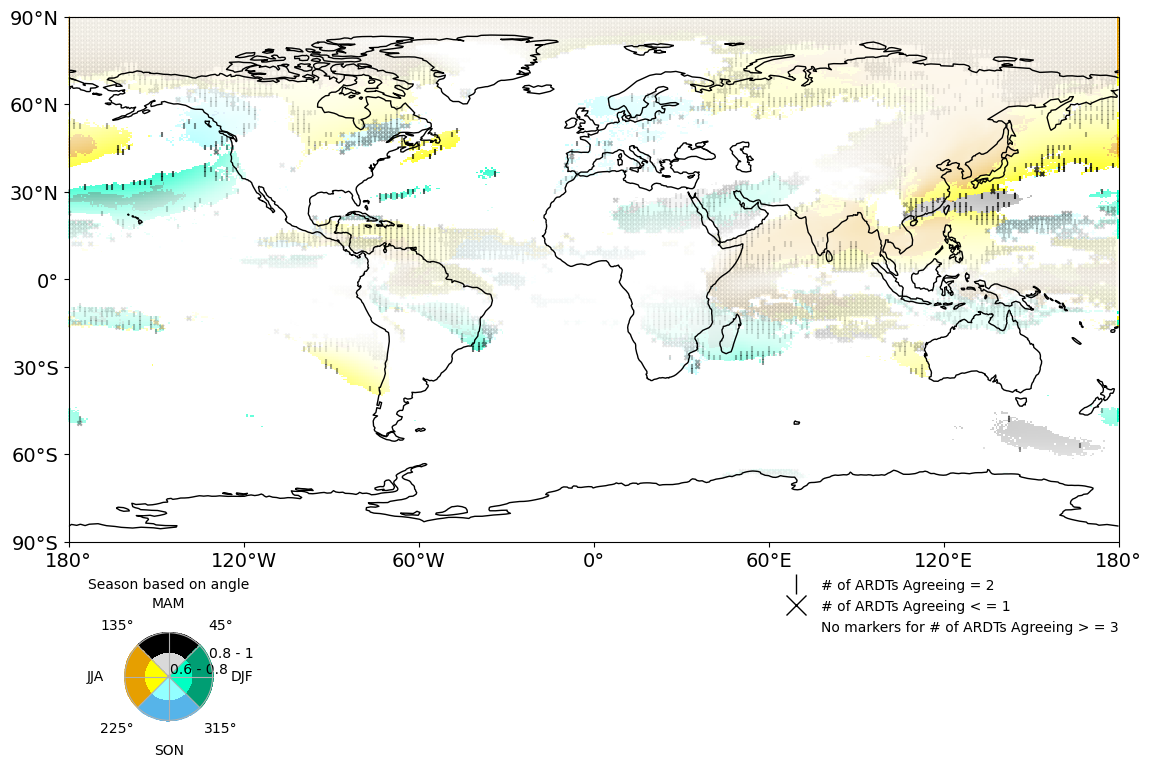

In [43]:
#Plotting the mean values
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
colors = [(0, 158/255, 115/255),(0, 0, 0), (230/255, 159/255, 0), (86/255, 180/255, 233/255)]
cmapplot=mcolors.ListedColormap(colors)
colors= [(0, 158/255, 115/255),(0.4, 0.4, 0.4), (230/255, 159/255, 0), (86/255, 180/255, 233/255)]
def lighten_color(color, factor=1.7):
    """
    Lightens the given color by multiplying each RGB channel by the given factor.
    """
    return tuple(min(channel * factor, 1.0) for channel in color)

# Lighter colors
lighter_colors = [lighten_color(color) for color in colors]
cmapplot2= mcolors.ListedColormap(lighter_colors)

# Create a new figure
fig = plt.figure(figsize=(20, 15))
projection = ccrs.PlateCarree()

# Define GeoAxes
ax1 = fig.add_subplot(2, 1, 1, projection=projection)
# Add the inset polar plot at a specific location within ax1
axcb = fig.add_axes([0.27, 0.41, 0.06, 0.06], projection='polar')

# Plot 
ax1.pcolormesh(lon, lat, MeanHC, cmap=cmapplot, transform=projection).set_alpha(mean_across_algorithms)
ax1.pcolormesh(lon, lat, MeanC, cmap=cmapplot2, transform=projection).set_alpha(mean_across_algorithms)
#ax1.set_title("Mean dominant peak season of AR activity across algorithms")
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')
ax1.coastlines()

# Longitude labels
ax1.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
# Increase font size of tick labels
ax1.tick_params(axis='x', labelsize=14) 

 # Latitude labels
ax1.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax1.yaxis.set_major_formatter(lat_formatter)
    # Increase font size of tick labels
ax1.tick_params(axis='y', labelsize=14) 
        
# Example: Normalize alpha values for scatter points
alpha_values = mean_across_algorithms.flatten()  # Ensure it's 1D and matches scatter points

# Generate RGBA colors for each scatter category
colors_red_1 = np.array([[0, 0, 0, a] for a in alpha_1])  # Red with 2D alpha
colors_red_2 = np.array([[0, 0, 0, a] for a in alpha_2])  # Red with 2D alpha
colors_black_3 = np.array([[0, 0, 0, a] for a in alpha_3])  # Black with 2D alpha

# Apply scatter with RGBA colors
ax1.scatter(lon_3, lat_3, marker="|", color=colors_black_3, s=15, transform=ccrs.PlateCarree(), zorder=6)
ax1.scatter(lon_2, lat_2, marker="x", color=colors_red_2, s=10, transform=ccrs.PlateCarree(), zorder=5)
ax1.scatter(lon_1, lat_1, marker="x", color=colors_red_1, s=10, transform=ccrs.PlateCarree(), zorder=4)

""""
# Plot all points at once for each category
ax1.scatter(lon_3, lat_3, marker="|", color='black', s=15, transform=ccrs.PlateCarree(), alpha=0.7, zorder=6)
ax1.scatter(lon_2, lat_2, marker="x", color='red', s=10, transform=ccrs.PlateCarree(), alpha=0.7, zorder=5)
ax1.scatter(lon_1, lat_1, marker="x", color='red', s=10, transform=ccrs.PlateCarree(), alpha=0.7, zorder=5)
"""
    

# Create the legend without the extra line for markers
legend_elements = [
    mlines.Line2D([], [], marker='|', markerfacecolor='black', markeredgecolor='black', markersize=15, label='# of ARDTs Agreeing = 2', linestyle='None'),  # Increased size
    mlines.Line2D([], [], marker='x', markerfacecolor='black', markeredgecolor='black', markersize=15, label='# of ARDTs Agreeing < = 1', linestyle='None'),   # Increased size
    mlines.Line2D([], [], color='none', label='No markers for # of ARDTs Agreeing > = 3 \u2007\u2007\u2007\u2007')
]

# Shift the legend by adjusting bbox_to_anchor
ax1.legend(
    handles=legend_elements,
    loc='lower right',
    bbox_to_anchor=(1.05, -0.20),  # (x, y) values: adjust to shift
    fontsize=10,
    framealpha=0
)

#Plot the Polar color wheel
# Color map for the theta values(0.8-1)
# Colorblind-friendly colors
colors = [(0, 0, 0), (230/255, 159/255, 0), (86/255, 180/255, 233/255), (0, 158/255, 115/255)]
n_bins = [45,135, 225, 315,405]  # Angle bins
cmap_name = "polar_color_wheel"
cmap = mpl.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=len(n_bins) - 1)

#Color map for THE THETA VALUES (0.6-0.8)
# Colorblind-friendly colors
colors = [(0.5, 0.5, 0.5), (230/255, 159/255, 0), (86/255, 180/255, 233/255), (0, 158/255, 115/255)]

# Factor to make colors lighter (you can adjust this as needed)
lightening_factor =1.7  # Multiply by 0.75 to make them lighter

# Create lighter colors by multiplying each component by the factor
lighter_colors = [(r * lightening_factor, g * lightening_factor, b * lightening_factor) for r, g, b in colors]

n_bins = [45, 135, 225, 315, 405]  # Angle bins
cmap_name2 = "polar_color_wheel"
cmap2 = mpl.colors.LinearSegmentedColormap.from_list(cmap_name2, lighter_colors, N=len(n_bins) - 1)
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(45*np.pi/180, 405*np.pi/180) 
# Plot a color mesh on the polar plot with the color set by the angle
n = 200 #the number of secants for the mesh
t = np.linspace(45*np.pi/180, 405*np.pi/180, n)   #theta values
r1 = np.linspace(.2, .4, 10)        #radius values change 0.6 to 0 for full circle
r2=np.linspace(0,.2,10)
rg, tg = np.meshgrid(r1, t)      #create an r, theta meshgrid
rg2,tg2=np.meshgrid(r2,t)
c1 = tg                   #define color values as theta value
c2=tg2
im=axcb.pcolormesh(t, r1,c1.T, norm=norm, cmap=cmap)  #plot the colormesh on axis with colormap
im=axcb.pcolormesh(t, r2, c2.T, norm=norm, cmap=cmap2)  #plot the colormesh on axis with colormap
axcb.set_yticklabels([])                   #turn off radial tick labels (yticks)
axcb.tick_params(pad=10, labelsize=10)      #cosmetic changes to tick labels
axcb.spines['polar'].set_visible(False)  
axcb.set_title('Season based on angle', fontsize=10)
custom_ticks = [0, np.pi/4, np.pi / 2, (135/180)*np.pi , np.pi, (225/180)*np.pi, (3/2)*np.pi,(315/180)*np.pi]
custom_tick_labels = ['DJF', '45°', 'MAM','135°', 'JJA', '225°', 'SON','315°']
axcb.set_xticks(custom_ticks)
axcb.set_xticklabels(custom_tick_labels,fontsize=10)

#radial_ticks = [.4, .8]
radial_ticks=[0.0,0.4]  # You can adjust these values as needed
axcb.set_yticks(radial_ticks)
#radial_ticks_labels = ['0.6-0.8', '0.8-1']  # You can adjust these values as needed
radial_ticks_labels = ['0.6 - 0.8','0.8 - 1']
axcb.set_yticklabels(radial_ticks_labels, fontsize=10)
"""
# Adding patches
ax1.add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# -100,45
ax1.annotate("1",(-122,15),color='black',fontsize=20)  # Change annotation color to black

ax1.add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                angle=-30,
                                transform=ccrs.PlateCarree())
             )
# -25,55
ax1.annotate("2",(-45,5),color='black',fontsize=20)  # Change annotation color to black

ax1.add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,  # Shifted right, slightly reduced width
                                alpha=0.5,
                                lw=1.2,  
                                facecolor='None',
                                edgecolor='black',  
                                angle=0,  
                                transform=ccrs.PlateCarree())
             )
ax1.annotate("3",(143,3.5),color='black',fontsize=20)  # Change annotation color to black

ax1.add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
# xy=[-85, -63], width=30, height=50
                                alpha=0.5,
                                lw=1,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# -80,-61
ax1.annotate("4",(-50,-50),color='black',fontsize=20)  # Change annotation color to black
# -96,-61
ax1.add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                angle=-10,
                                transform=ccrs.PlateCarree())
             )
# 35,-40
ax1.annotate("6",(30,-60),color='black',fontsize=20)  # Change annotation color to black

ax1.add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
# xy=[140, -45], width=30, height=30
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                angle=-20,
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )
# 157,-42
ax1.annotate("5",(0,-60),color='black',fontsize=20)  # Change annotation color to black

ax1.add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                alpha=0.5,
                                lw=1.2,  # Reduce thickness to 1
                                angle=0,  # Remove rotation
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )

ax1.annotate("7", (170, -55), color='black', fontsize=20)  # Shift annotation to the right
"""

#plt.tight_layout()
plt.savefig("Figure8.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()